In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')  # отключаем предупреждения

In [2]:
df = pd.read_csv('ml-course-main/data/heart_disease/heart.csv')
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [3]:
df.target.value_counts()
# 526 - с положительны диагнозом, 499 - с отрицательным

1    526
0    499
Name: target, dtype: int64

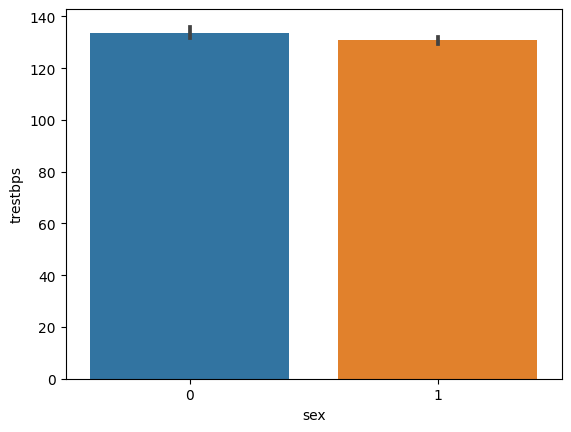

In [4]:
sns.barplot(x = "sex", y = "trestbps", data = df); # у женщин обычно большее давление

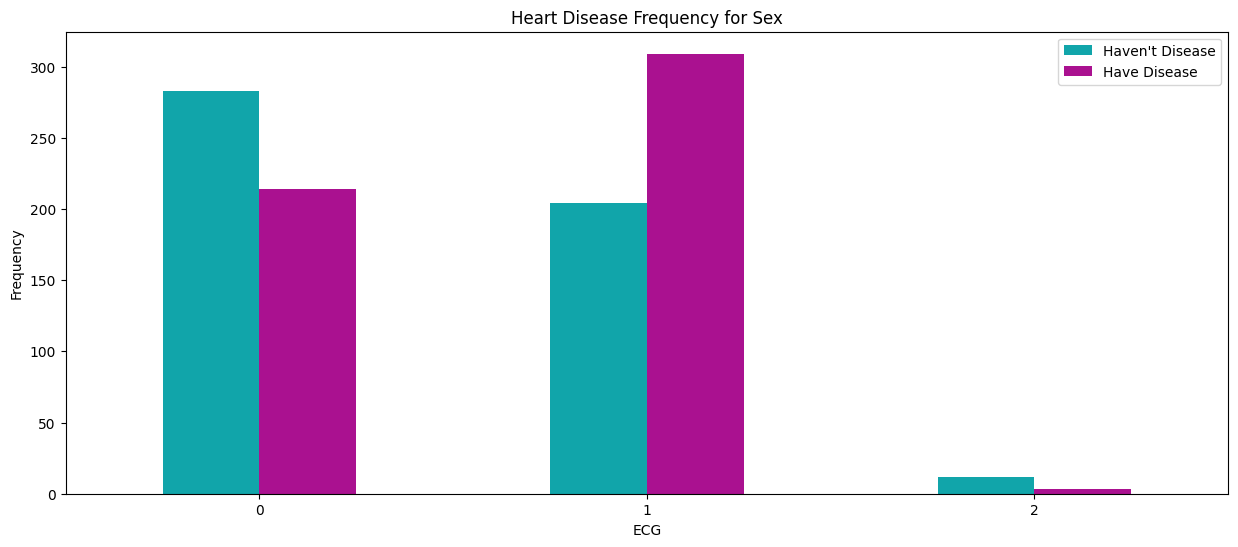

In [5]:
pd.crosstab(df.restecg,df.target).plot(kind="bar", figsize=(15, 6), color=['#11A5AA', '#AA1190' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('ECG')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

In [6]:
# люди с показателем restecg=1 наиболее предрасположены к заболеванию

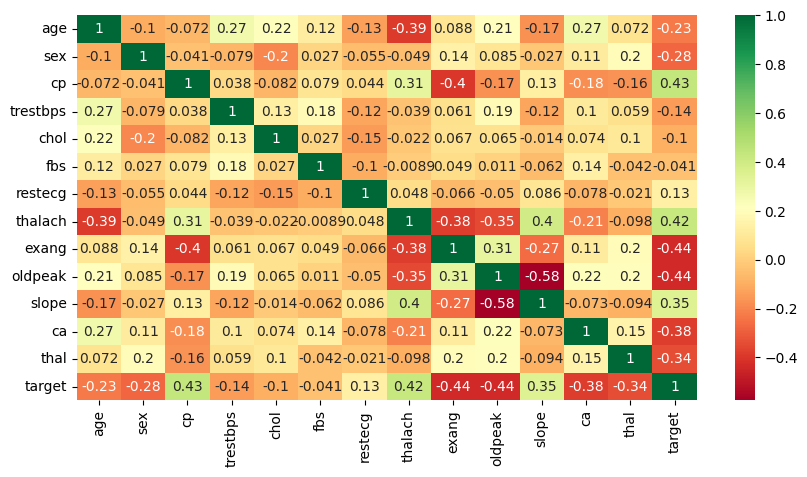

In [7]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

In [8]:
#присутствует большая зависимость диагноза от категории грудной боли cp, а также от максимального пульса.

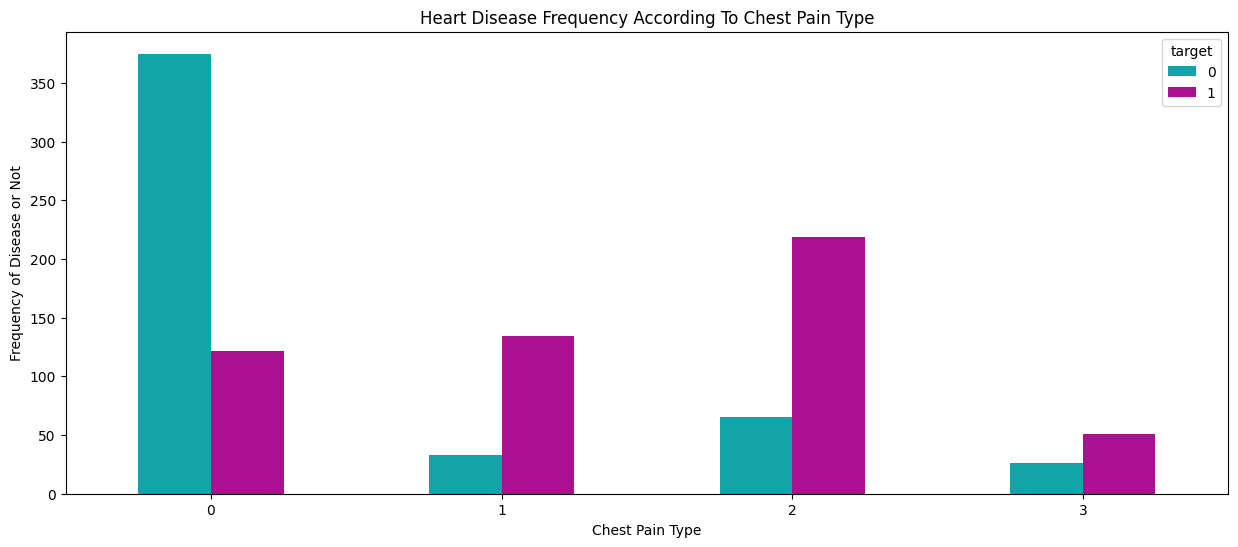

In [9]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15, 6), color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

In [10]:
# из гистограммы видно, что люди, обращавшиеся с болью в груди категории 2, наиболее предрасположены к заболеванию

In [11]:
cp_dum = pd.get_dummies(df['cp'], prefix = "cp")
thal_dum = pd.get_dummies(df['thal'], prefix = "thal")
slope_dum = pd.get_dummies(df['slope'], prefix = "slope")

frames = [df, cp_dum, thal_dum, slope_dum]
df = pd.concat(frames, axis = 1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,0,125,212,0,1,168,0,1.0,...,0,0,0,0,0,0,1,0,0,1
1,53,1,0,140,203,1,0,155,1,3.1,...,0,0,0,0,0,0,1,1,0,0
2,70,1,0,145,174,0,1,125,1,2.6,...,0,0,0,0,0,0,1,1,0,0
3,61,1,0,148,203,0,1,161,0,0.0,...,0,0,0,0,0,0,1,0,0,1
4,62,0,0,138,294,1,1,106,0,1.9,...,0,0,0,0,0,1,0,0,1,0


In [12]:
df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,125,212,0,1,168,0,1.0,2,...,0,0,0,0,0,0,1,0,0,1
1,53,1,140,203,1,0,155,1,3.1,0,...,0,0,0,0,0,0,1,1,0,0
2,70,1,145,174,0,1,125,1,2.6,0,...,0,0,0,0,0,0,1,1,0,0
3,61,1,148,203,0,1,161,0,0.0,1,...,0,0,0,0,0,0,1,0,0,1
4,62,0,138,294,1,1,106,0,1.9,3,...,0,0,0,0,0,1,0,0,1,0


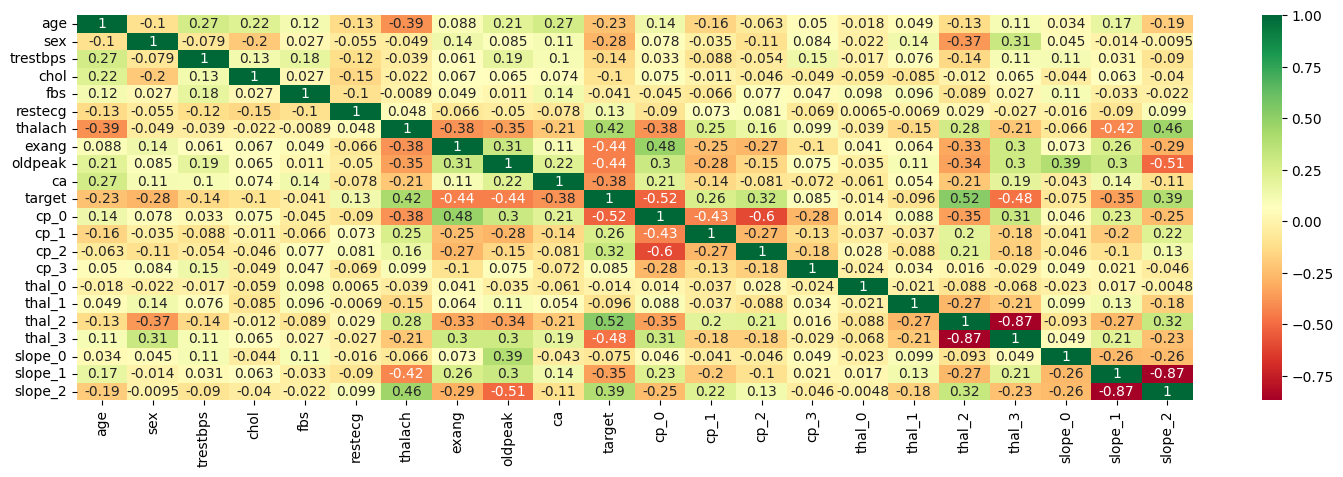

In [18]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(18, 5)
plt.show()

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
y = df["target"]
X = df.drop(columns=["target"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Optimal number of features: 13
Selected features: ['sex', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak', 'ca', 'cp_0', 'cp_2', 'cp_3', 'thal_0', 'thal_3', 'slope_1']


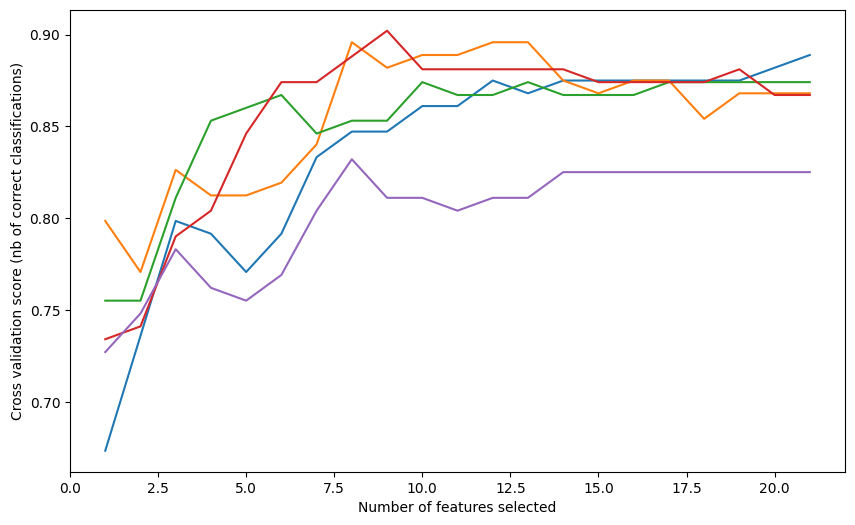

In [19]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=5, scoring='accuracy')
rfecv.fit(X_train_scaled, y_train)
cols = ["age","sex","trestbps","chol","fbs","restecg","thalach","exang","oldpeak",
        "ca","cp_0","cp_1","cp_2","cp_3","thal_0","thal_1","thal_2","thal_3","slope_0","slope_1","slope_2"]

selected_features_logregr = list(rfecv.get_feature_names_out(cols))

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % selected_features_logregr)

plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

to_drop = df.drop(columns=selected_features_logregr)
df = df.drop(columns=to_drop)

In [20]:
df.head()

,sex,trestbps,chol,thalach,exang,oldpeak,ca,cp_0,cp_2,cp_3,thal_0,thal_3,slope_1
0,1,125,212,168,0,1.0,2,1,0,0,0,1,0
1,1,140,203,155,1,3.1,0,1,0,0,0,1,0
2,1,145,174,125,1,2.6,0,1,0,0,0,1,0
3,1,148,203,161,0,0.0,1,1,0,0,0,1,0
4,0,138,294,106,0,1.9,3,1,0,0,0,0,1


In [529]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=188)
scaler = StandardScaler()  
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [530]:
import numpy as np
import random
import sklearn
from sklearn.datasets import make_regression 
import pylab
from scipy import stats
from sklearn.base import BaseEstimator
from sklearn.utils.estimator_checks import check_estimator
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted

class GradientDescent(BaseEstimator):
    def __init__(self, alpha=0.01, numIterations=50000):
        self.alpha = alpha
        self.numIterations = numIterations
    
    def fit(self,x,y):
        x,y = check_X_y(x,y) #Checking if both X & y has correct shape
        self.n_features_in_ = x.shape[1] #Setting the number of features in Input data (new as per 0.24)
        m = x.shape[0]
        self.x_ = np.c_[ np.ones(m), x] #theta0 = ones
        self.theta_ = np.ones(self.x_.shape[1])
        x_transpose = self.x_.transpose()
        
        for iter in range(0, self.numIterations):
            hypothesis = np.dot(self.x_, self.theta_)
            loss = hypothesis - y
            gradient = np.dot(x_transpose, loss) / m         
            self.theta_ = self.theta_ - self.alpha * gradient  # update weights
            
        self.coef_ = self.theta_[1:]
        self.intercept_ = self.theta_[0]
        return self #Should Return Self : Mandatory
    
    def predict(self,X_test):
        check_is_fitted(self) # Check to verify the Fit has been called
        X_test = check_array(X_test) # Validate the input
        return X_test@self.coef_+self.intercept_

best estimator: GradientDescent(alpha=0.00501)
best params: {'alpha': 0.00501}
best score: -0.738641735982672


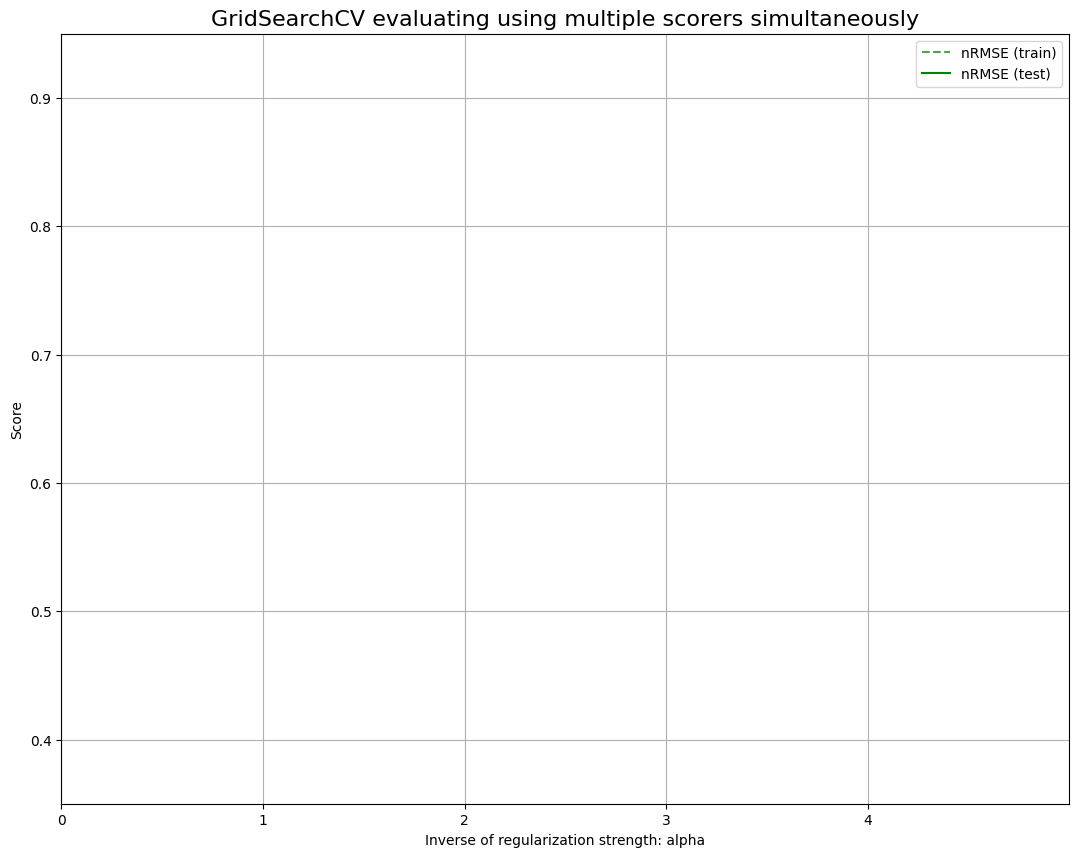

In [21]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': np.arange(1e-05, 0.01, 0.001)}
scoring = {'nRMSE': 'neg_root_mean_squared_error'}

gs = GridSearchCV(GradientDescent(), return_train_score=True,
                  param_grid=param_grid, scoring=scoring, cv=5, refit='nRMSE')

gs.fit(X_train_scaled, y_train)
results = gs.cv_results_

print('='*20)
print("best estimator: " + str(gs.best_estimator_))
print("best params: " + str(gs.best_params_))
print('best score:', gs.best_score_)
print('='*20)

plt.figure(figsize=(13, 10))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",fontsize=16)

plt.xlabel("Inverse of regularization strength: alpha")
plt.ylabel("Score")
plt.grid()

ax = plt.gca()
ax.set_xlim(0, param_grid['alpha'].max()) 
ax.set_ylim(0.001, 0.006)

X_axis = np.array(results['param_alpha'].data, dtype=float)

for scorer, color in zip(list(scoring.keys()), ['g', 'k', 'b']): 
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = -results['mean_%s_%s' % (sample, scorer)] if scoring[scorer]=='neg_log_loss' else results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = -results['mean_test_%s' % scorer][best_index] if scoring[scorer]=='neg_log_loss' else results['mean_test_%s' % scorer][best_index]
        
    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid('off')
plt.show()

In [ ]:
# без создания метода score в классе GradientDescent нельзя добавить различные метрики для сравнения 

In [531]:
alpha = 0.00501
gd_model = GradientDescent(alpha,10000)
gd_model.fit(X_train_scaled, y_train)
gd_y_test_pred = gd_model.predict(X_test_scaled)
gd_y_train_pred = gd_model.predict(X_train_scaled)

In [532]:
for i in range(gd_y_test_pred.shape[0]):
    if gd_y_test_pred[i] > 0.58:
        gd_y_test_pred[i] = 1
    else:
        gd_y_test_pred[i] = 0
gd_y_test_pred = gd_y_test_pred.astype(int)

for i in range(gd_y_train_pred.shape[0]):
    if gd_y_train_pred[i] > 0.58:
        gd_y_train_pred[i] = 1
    else:
        gd_y_train_pred[i] = 0
gd_y_train_pred = gd_y_train_pred.astype(int)

In [545]:
from sklearn.metrics import accuracy_score
gd_test_acc = accuracy_score(y_test, gd_y_test_pred)
print("Test GD Accuracy {:.4f}".format(gd_test_acc))
accuracies = {}
accuracies['Gradient Descent'] = gd_test_acc

Test GD Accuracy 0.8701


In [546]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
lr_acc = lr.score(X_test_scaled, y_test)
accuracies['Logistic Regression'] = lr_acc
print("Test LR Accuracy {:.4f}".format(lr_acc))

Test LR Accuracy 0.8344


In [547]:
from sklearn.svm import SVC
svm = SVC(random_state = 12)
svm.fit(X_train_scaled, y_train)
svm_acc = svm.score(X_test_scaled, y_test)
accuracies['SVM'] = svm_acc
print("Test SVM Accuracy: {:.4f}".format(svm_acc))

Test SVM Accuracy: 0.8799


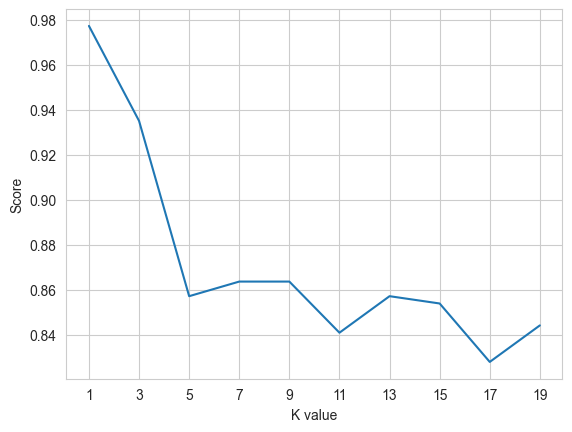

Maximum KNN Score is 0.9773


In [548]:
from sklearn.neighbors import KNeighborsClassifier
scoreList = []
for i in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train_scaled, y_train)
    scoreList.append(knn.score(X_test_scaled, y_test))  
plt.plot(range(1, 20, 2), scoreList)
plt.xticks(np.arange(1, 20, 2))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
knn_acc = max(scoreList)
accuracies['KNN'] = knn_acc
print("Maximum KNN Score is {:.4f}".format(knn_acc))

In [549]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
nb_acc = nb.score(X_test_scaled, y_test)
accuracies['Naive Bayes'] = nb_acc
print("Accuracy of Naive Bayes: {:.4f}".format(nb_acc))

Accuracy of Naive Bayes: 0.8247


In [550]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train_scaled, y_train)
dt_acc = dtc.score(X_test_scaled, y_test)
accuracies['Decision Tree'] = dt_acc
print("Decision Tree Test Accuracy {:.4f}".format(dt_acc))

Decision Tree Test Accuracy 0.9805


In [551]:
#доп. задание, добавление MLP классификатора
from sklearn.neural_network import MLPClassifier
nn_clfr = MLPClassifier(random_state=1, max_iter=3000).fit(X_train_scaled, y_train)
nn_clfr_acc = dtc.score(X_test_scaled, y_test)
accuracies['MLP'] = nn_clfr_acc
print("MLP Classifier Test Accuracy {:.4f}".format(nn_clfr_acc))

MLP Classifier Test Accuracy 0.9805


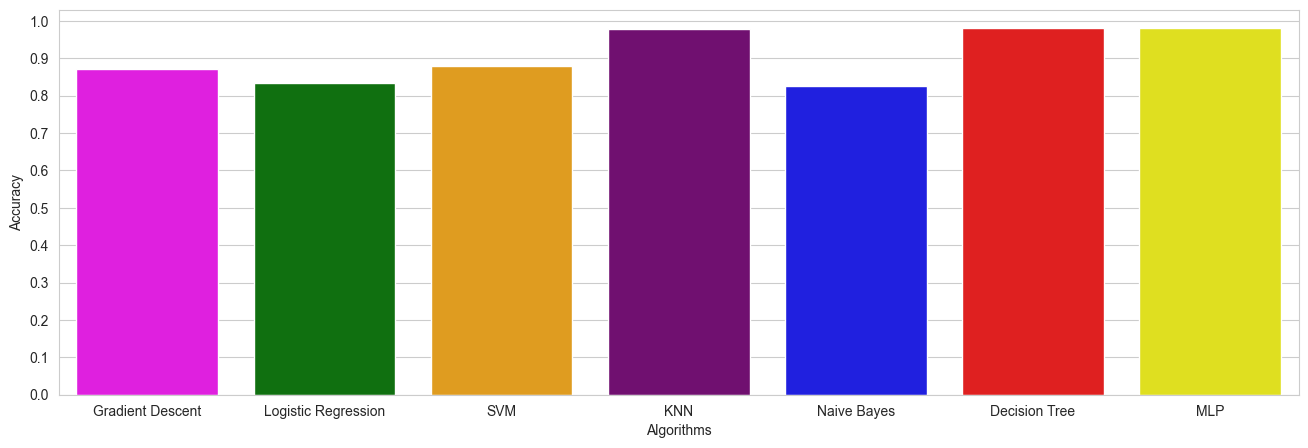

In [552]:
colors = ["magenta", "green", "orange", "purple", "blue", "red","yellow"]

sns.set_style("whitegrid")
plt.figure(figsize=(16, 5))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylabel("Accuracy")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

In [553]:
#на предложенной выборке данных лучшими алгоритмами классификации являются дерево решений и многослойный персептрон

In [554]:
lr_pred = lr.predict(X_test_scaled)
svm_pred = svm.predict(X_test_scaled)
knn_pred = knn.predict(X_test_scaled)
nb_pred = nb.predict(X_test_scaled)
dtc_pred = dtc.predict(X_test_scaled)
nn_clfr_pred = nn_clfr.predict(X_test_scaled)

In [555]:
from sklearn.metrics import confusion_matrix
cm_gd = confusion_matrix(y_test, gd_y_test_pred)
cm_lr = confusion_matrix(y_test, lr_pred)
cm_svm = confusion_matrix(y_test, svm_pred)
cm_knn = confusion_matrix(y_test, knn_pred)
cm_nb = confusion_matrix(y_test, nb_pred)
cm_dtc = confusion_matrix(y_test, dtc_pred)
cm_nn_clfr = confusion_matrix(y_test, nn_clfr_pred)

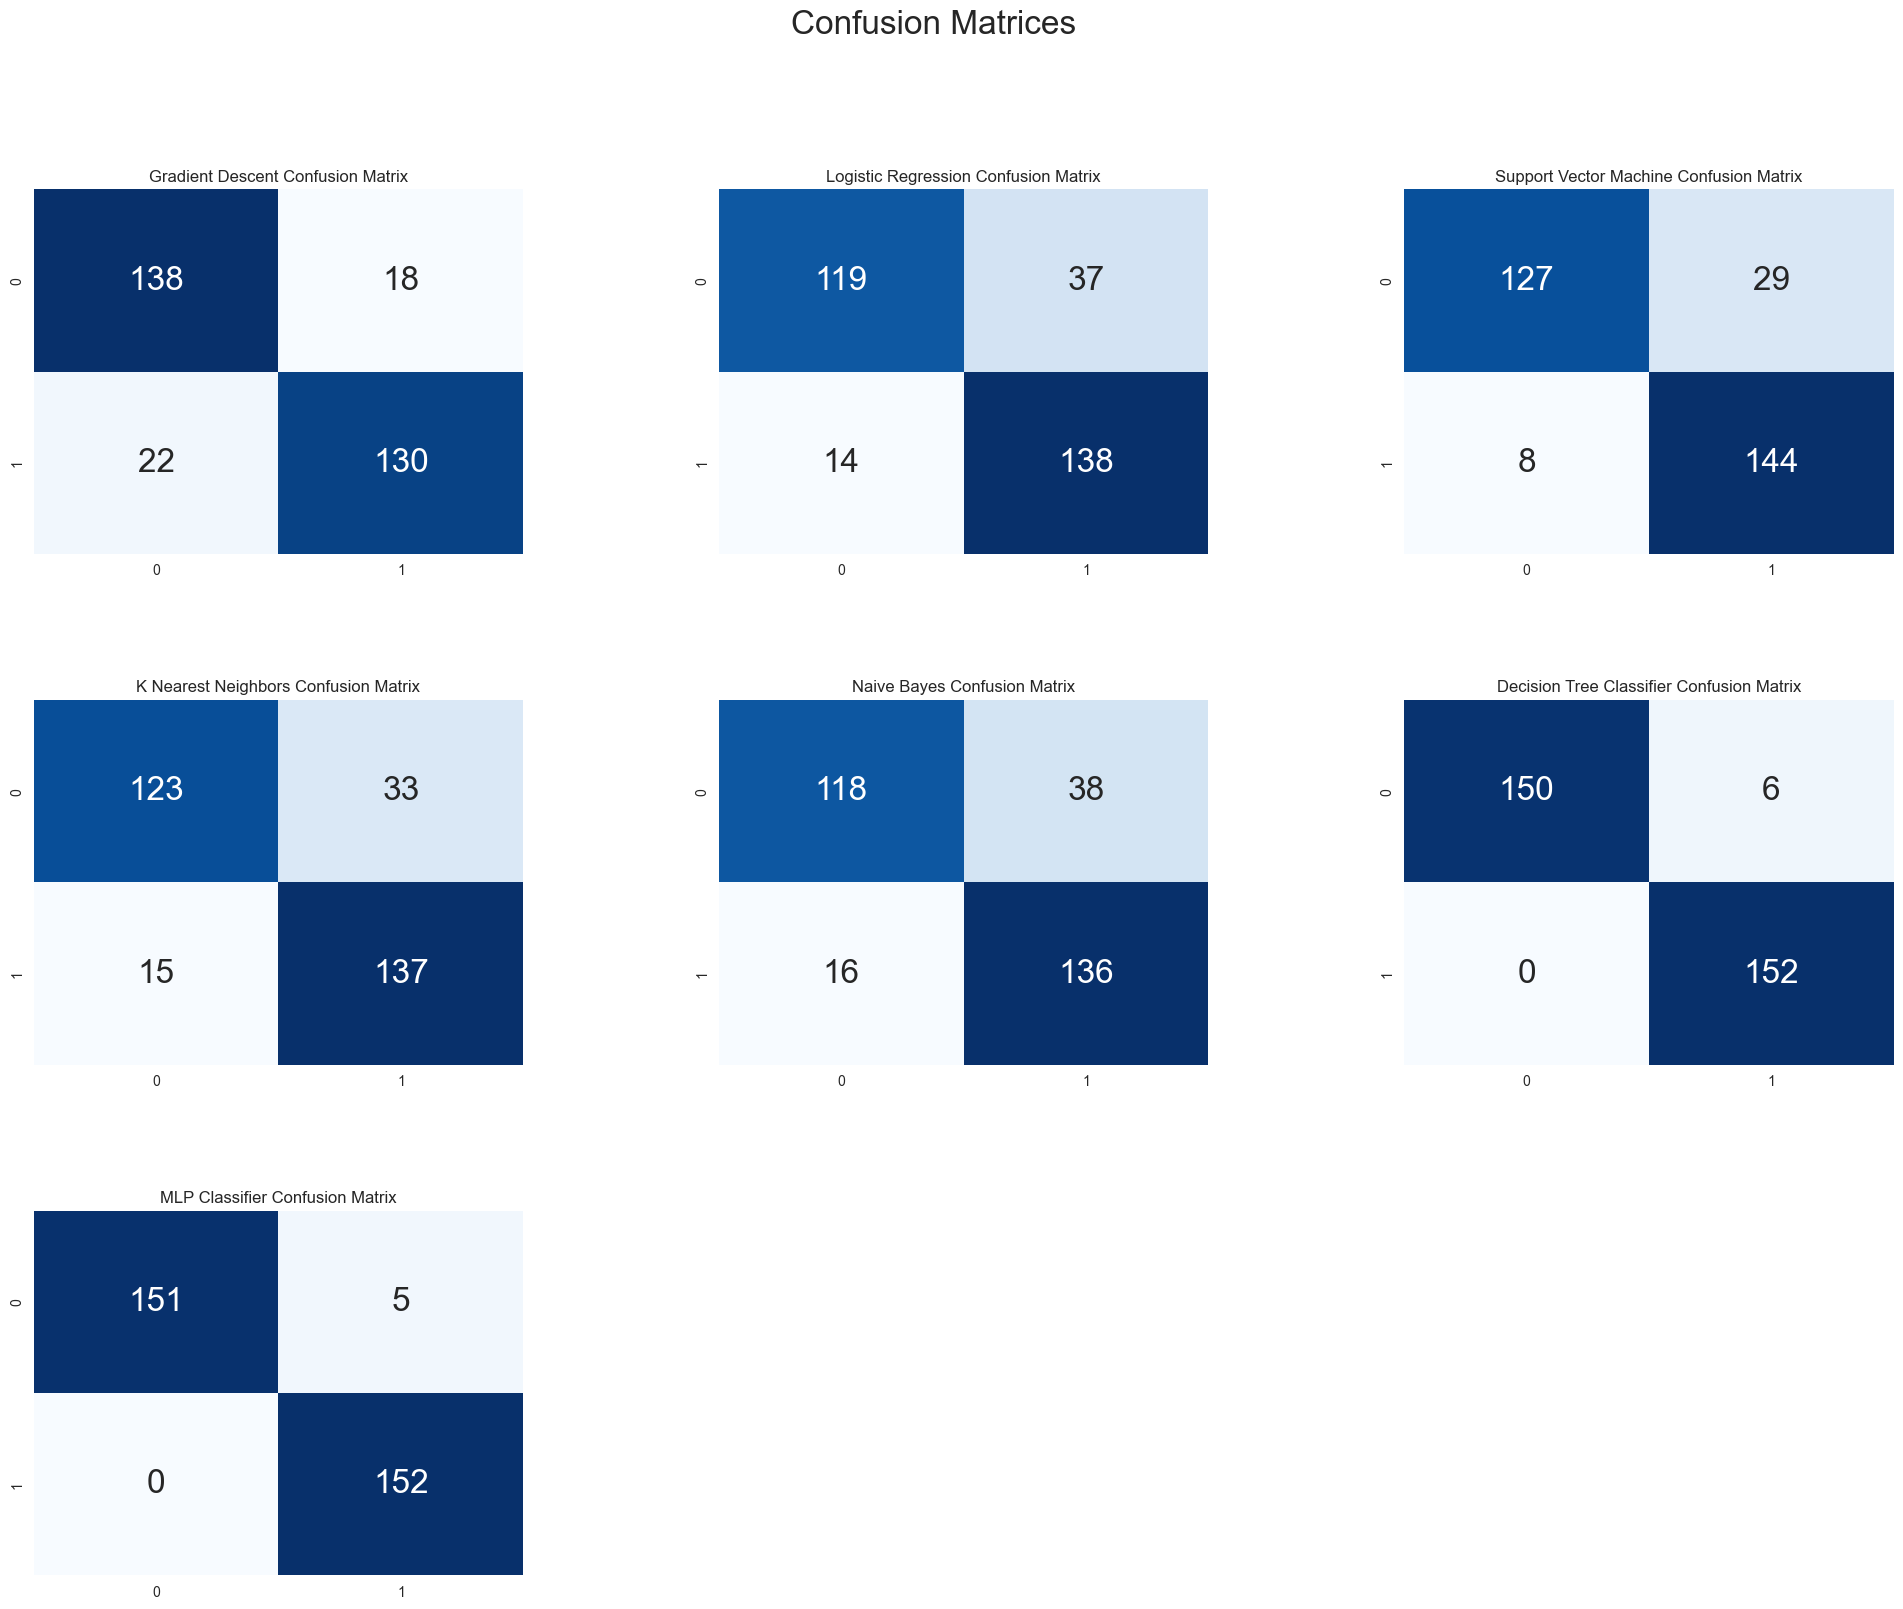

In [556]:
plt.figure(figsize=(24, 18))

plt.suptitle("Confusion Matrices", fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(3,3,1)
plt.title("Gradient Descent Confusion Matrix")
sns.heatmap(cm_gd,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,2)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,4)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,5)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,6)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,7)
plt.title("MLP Classifier Confusion Matrix")
sns.heatmap(cm_nn_clfr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

In [ ]:
#у решающего дерева 6 ложно-положительных значений, у персептрона 5 ложно-положительных значений

In [ ]:
0.8571 88
0.8669 158
0.8701 188
0.8539 248

In [ ]:
#классификация заболевания диабетом

In [2]:
df = pd.read_csv('ml-course-main/data/diabetes.csv', encoding = "ISO-8859-1")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


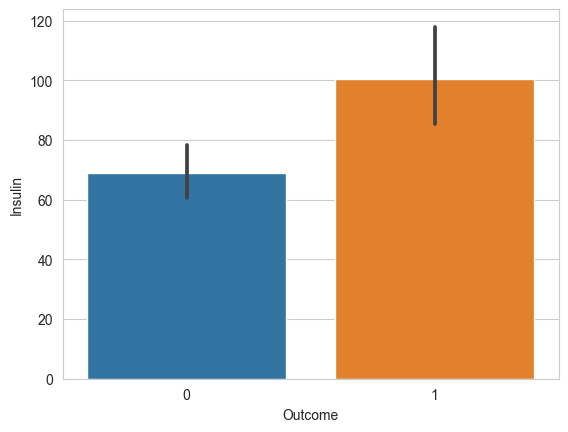

In [588]:
sns.barplot(x = "Outcome", y = "Insulin", data = df); # у болеющих содержится больше инсулина в крови

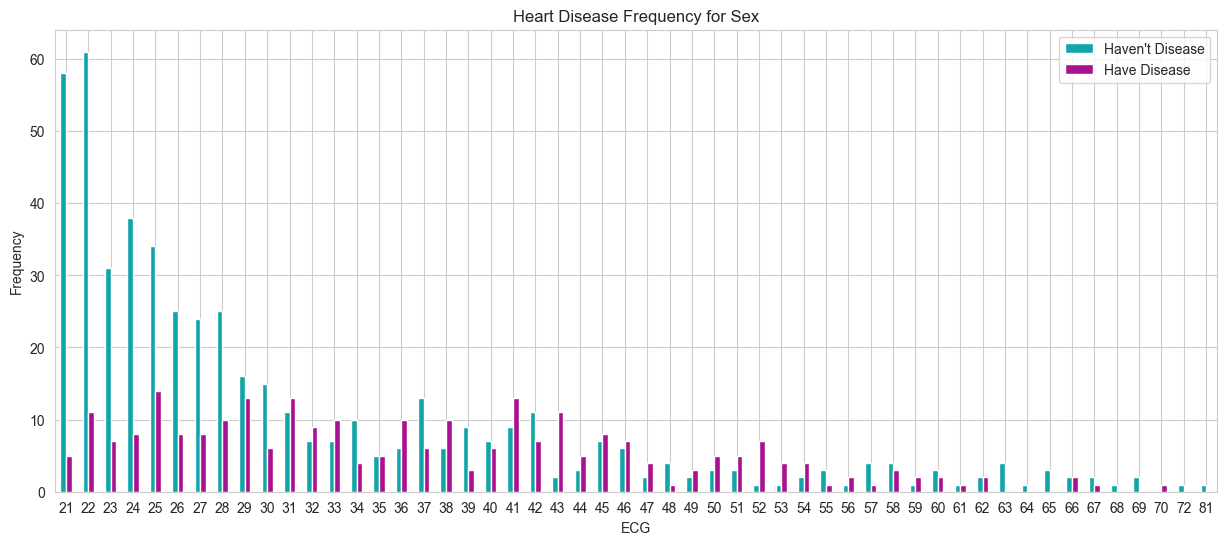

In [612]:
pd.crosstab(df.Age,df.Outcome).plot(kind="bar", figsize=(15, 6), color=['#11A5AA', '#AA1190' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Age')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()
# повышения уровня заболеваемости происходит после 30 лет.

In [589]:
df.Outcome.value_counts()
# 268 людей болеет

0    500
1    268
Name: Outcome, dtype: int64

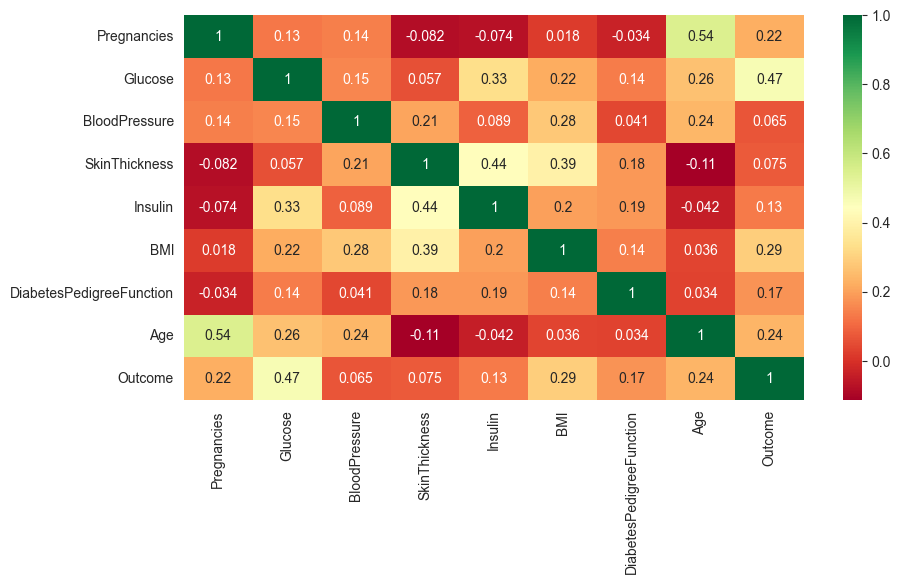

In [608]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()
#наличие глюкозы в крови сильно коррелирует с конечным диагнозом

In [592]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
y = df["Outcome"]
X = df.drop(columns=["Outcome"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=188)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Optimal number of features: 8
Selected features: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


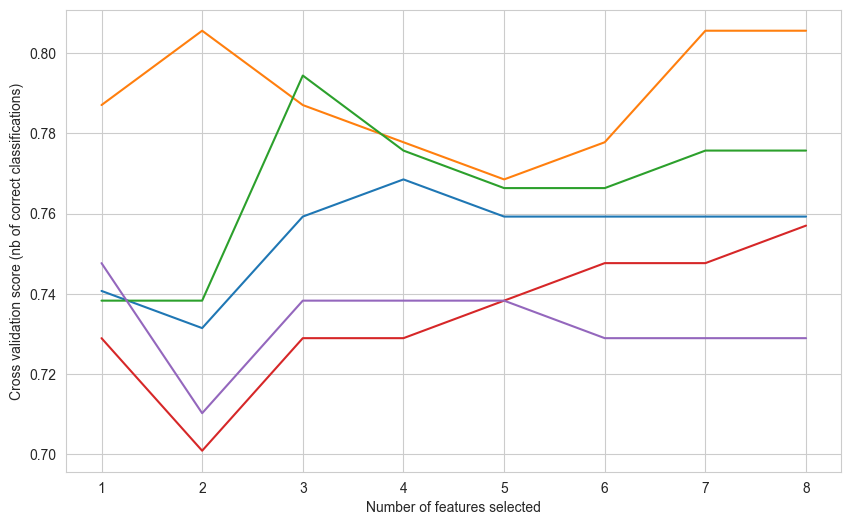

In [593]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=5, scoring='accuracy')
rfecv.fit(X_train_scaled, y_train)
cols = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin",
        "BMI","DiabetesPedigreeFunction","Age"]

selected_features_logregr = list(rfecv.get_feature_names_out(cols))

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % selected_features_logregr)

plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

#to_drop = df.drop(columns=selected_features_logregr)
#df = df.drop(columns=to_drop)

In [594]:
import numpy as np
import random
import sklearn
from sklearn.datasets import make_regression 
import pylab
from scipy import stats
from sklearn.base import BaseEstimator
from sklearn.utils.estimator_checks import check_estimator
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted

class GradientDescent(BaseEstimator):
    def __init__(self, alpha=0.01, numIterations=50000):
        self.alpha = alpha
        self.numIterations = numIterations
    
    def fit(self,x,y):
        x,y = check_X_y(x,y) #Checking if both X & y has correct shape
        self.n_features_in_ = x.shape[1] #Setting the number of features in Input data (new as per 0.24)
        m = x.shape[0]
        self.x_ = np.c_[ np.ones(m), x] #theta0 = ones
        self.theta_ = np.ones(self.x_.shape[1])
        x_transpose = self.x_.transpose()
        
        for iter in range(0, self.numIterations):
            hypothesis = np.dot(self.x_, self.theta_)
            loss = hypothesis - y
            gradient = np.dot(x_transpose, loss) / m         
            self.theta_ = self.theta_ - self.alpha * gradient  # update weights
            
        self.coef_ = self.theta_[1:]
        self.intercept_ = self.theta_[0]
        return self #Should Return Self : Mandatory
    
    def predict(self,X_test):
        check_is_fitted(self) # Check to verify the Fit has been called
        X_test = check_array(X_test) # Validate the input
        return X_test@self.coef_+self.intercept_

In [595]:
alpha = 0.00501
gd_model = GradientDescent(alpha,10000)
gd_model.fit(X_train_scaled, y_train)
gd_y_test_pred = gd_model.predict(X_test_scaled)
gd_y_train_pred = gd_model.predict(X_train_scaled)

In [596]:
for i in range(gd_y_test_pred.shape[0]):
    if gd_y_test_pred[i] > 0.58:
        gd_y_test_pred[i] = 1
    else:
        gd_y_test_pred[i] = 0
gd_y_test_pred = gd_y_test_pred.astype(int)

for i in range(gd_y_train_pred.shape[0]):
    if gd_y_train_pred[i] > 0.58:
        gd_y_train_pred[i] = 1
    else:
        gd_y_train_pred[i] = 0
gd_y_train_pred = gd_y_train_pred.astype(int)

In [597]:
from sklearn.metrics import accuracy_score
gd_test_acc = accuracy_score(y_test, gd_y_test_pred)
print("Test GD Accuracy {:.4f}".format(gd_test_acc))
accuracies = {}
accuracies['Gradient Descent'] = gd_test_acc

Test GD Accuracy 0.7835


In [598]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
lr_acc = lr.score(X_test_scaled, y_test)
accuracies['Logistic Regression'] = lr_acc
print("Test LR Accuracy {:.4f}".format(lr_acc))

Test LR Accuracy 0.7879


In [599]:
from sklearn.svm import SVC
svm = SVC(random_state = 12)
svm.fit(X_train_scaled, y_train)
svm_acc = svm.score(X_test_scaled, y_test)
accuracies['SVM'] = svm_acc
print("Test SVM Accuracy: {:.4f}".format(svm_acc))

Test SVM Accuracy: 0.7576


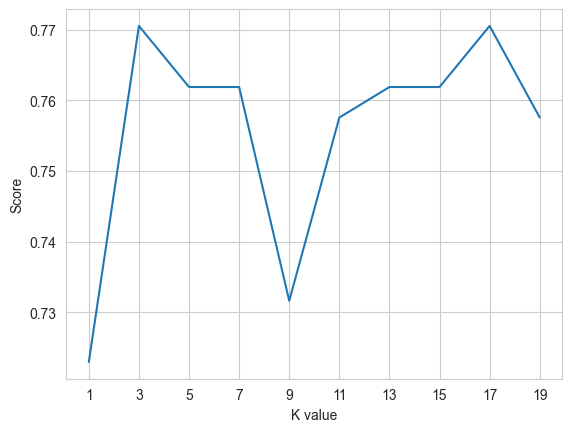

Maximum KNN Score is 0.7706


In [600]:
from sklearn.neighbors import KNeighborsClassifier
scoreList = []
for i in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train_scaled, y_train)
    scoreList.append(knn.score(X_test_scaled, y_test))  
plt.plot(range(1, 20, 2), scoreList)
plt.xticks(np.arange(1, 20, 2))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
knn_acc = max(scoreList)
accuracies['KNN'] = knn_acc
print("Maximum KNN Score is {:.4f}".format(knn_acc))

In [601]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
nb_acc = nb.score(X_test_scaled, y_test)
accuracies['Naive Bayes'] = nb_acc
print("Accuracy of Naive Bayes: {:.4f}".format(nb_acc))

Accuracy of Naive Bayes: 0.7662


In [602]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train_scaled, y_train)
dt_acc = dtc.score(X_test_scaled, y_test)
accuracies['Decision Tree'] = dt_acc
print("Decision Tree Test Accuracy {:.4f}".format(dt_acc))

Decision Tree Test Accuracy 0.6797


In [611]:
from sklearn.neural_network import MLPClassifier
nn_clfr = MLPClassifier(random_state=1, max_iter=3000).fit(X_train_scaled, y_train)
nn_clfr_acc = nn_clfr.score(X_test_scaled, y_test)
accuracies['MLP'] = nn_clfr_acc
print("MLP Classifier Test Accuracy {:.4f}".format(nn_clfr_acc))

MLP Classifier Test Accuracy 0.6970


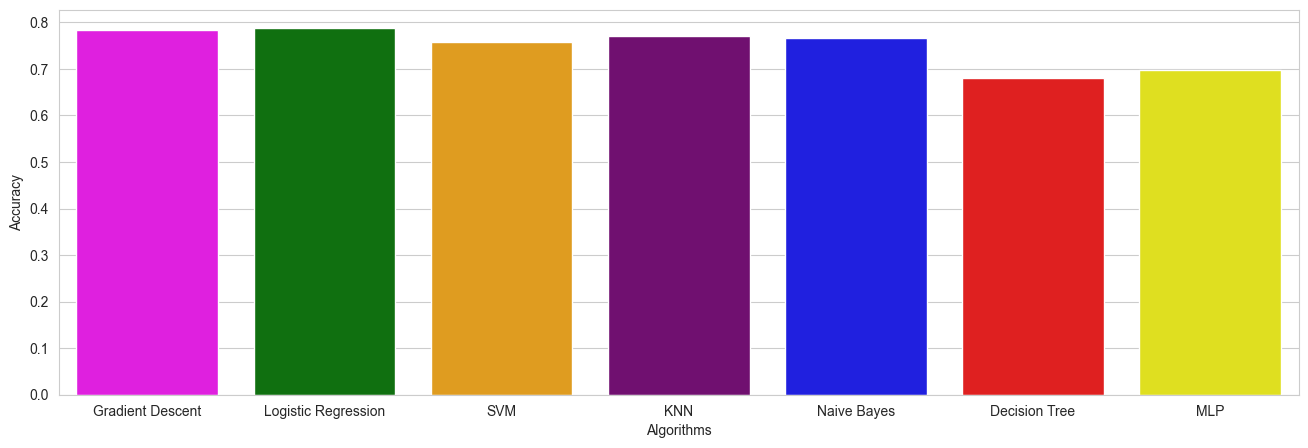

In [604]:
colors = ["magenta", "green", "orange", "purple", "blue", "red","yellow"]

sns.set_style("whitegrid")
plt.figure(figsize=(16, 5))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylabel("Accuracy")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

In [605]:
lr_pred = lr.predict(X_test_scaled)
svm_pred = svm.predict(X_test_scaled)
knn_pred = knn.predict(X_test_scaled)
nb_pred = nb.predict(X_test_scaled)
dtc_pred = dtc.predict(X_test_scaled)
nn_clfr_pred = nn_clfr.predict(X_test_scaled)

In [606]:
from sklearn.metrics import confusion_matrix
cm_gd = confusion_matrix(y_test, gd_y_test_pred)
cm_lr = confusion_matrix(y_test, lr_pred)
cm_svm = confusion_matrix(y_test, svm_pred)
cm_knn = confusion_matrix(y_test, knn_pred)
cm_nb = confusion_matrix(y_test, nb_pred)
cm_dtc = confusion_matrix(y_test, dtc_pred)
cm_nn_clfr = confusion_matrix(y_test, nn_clfr_pred)

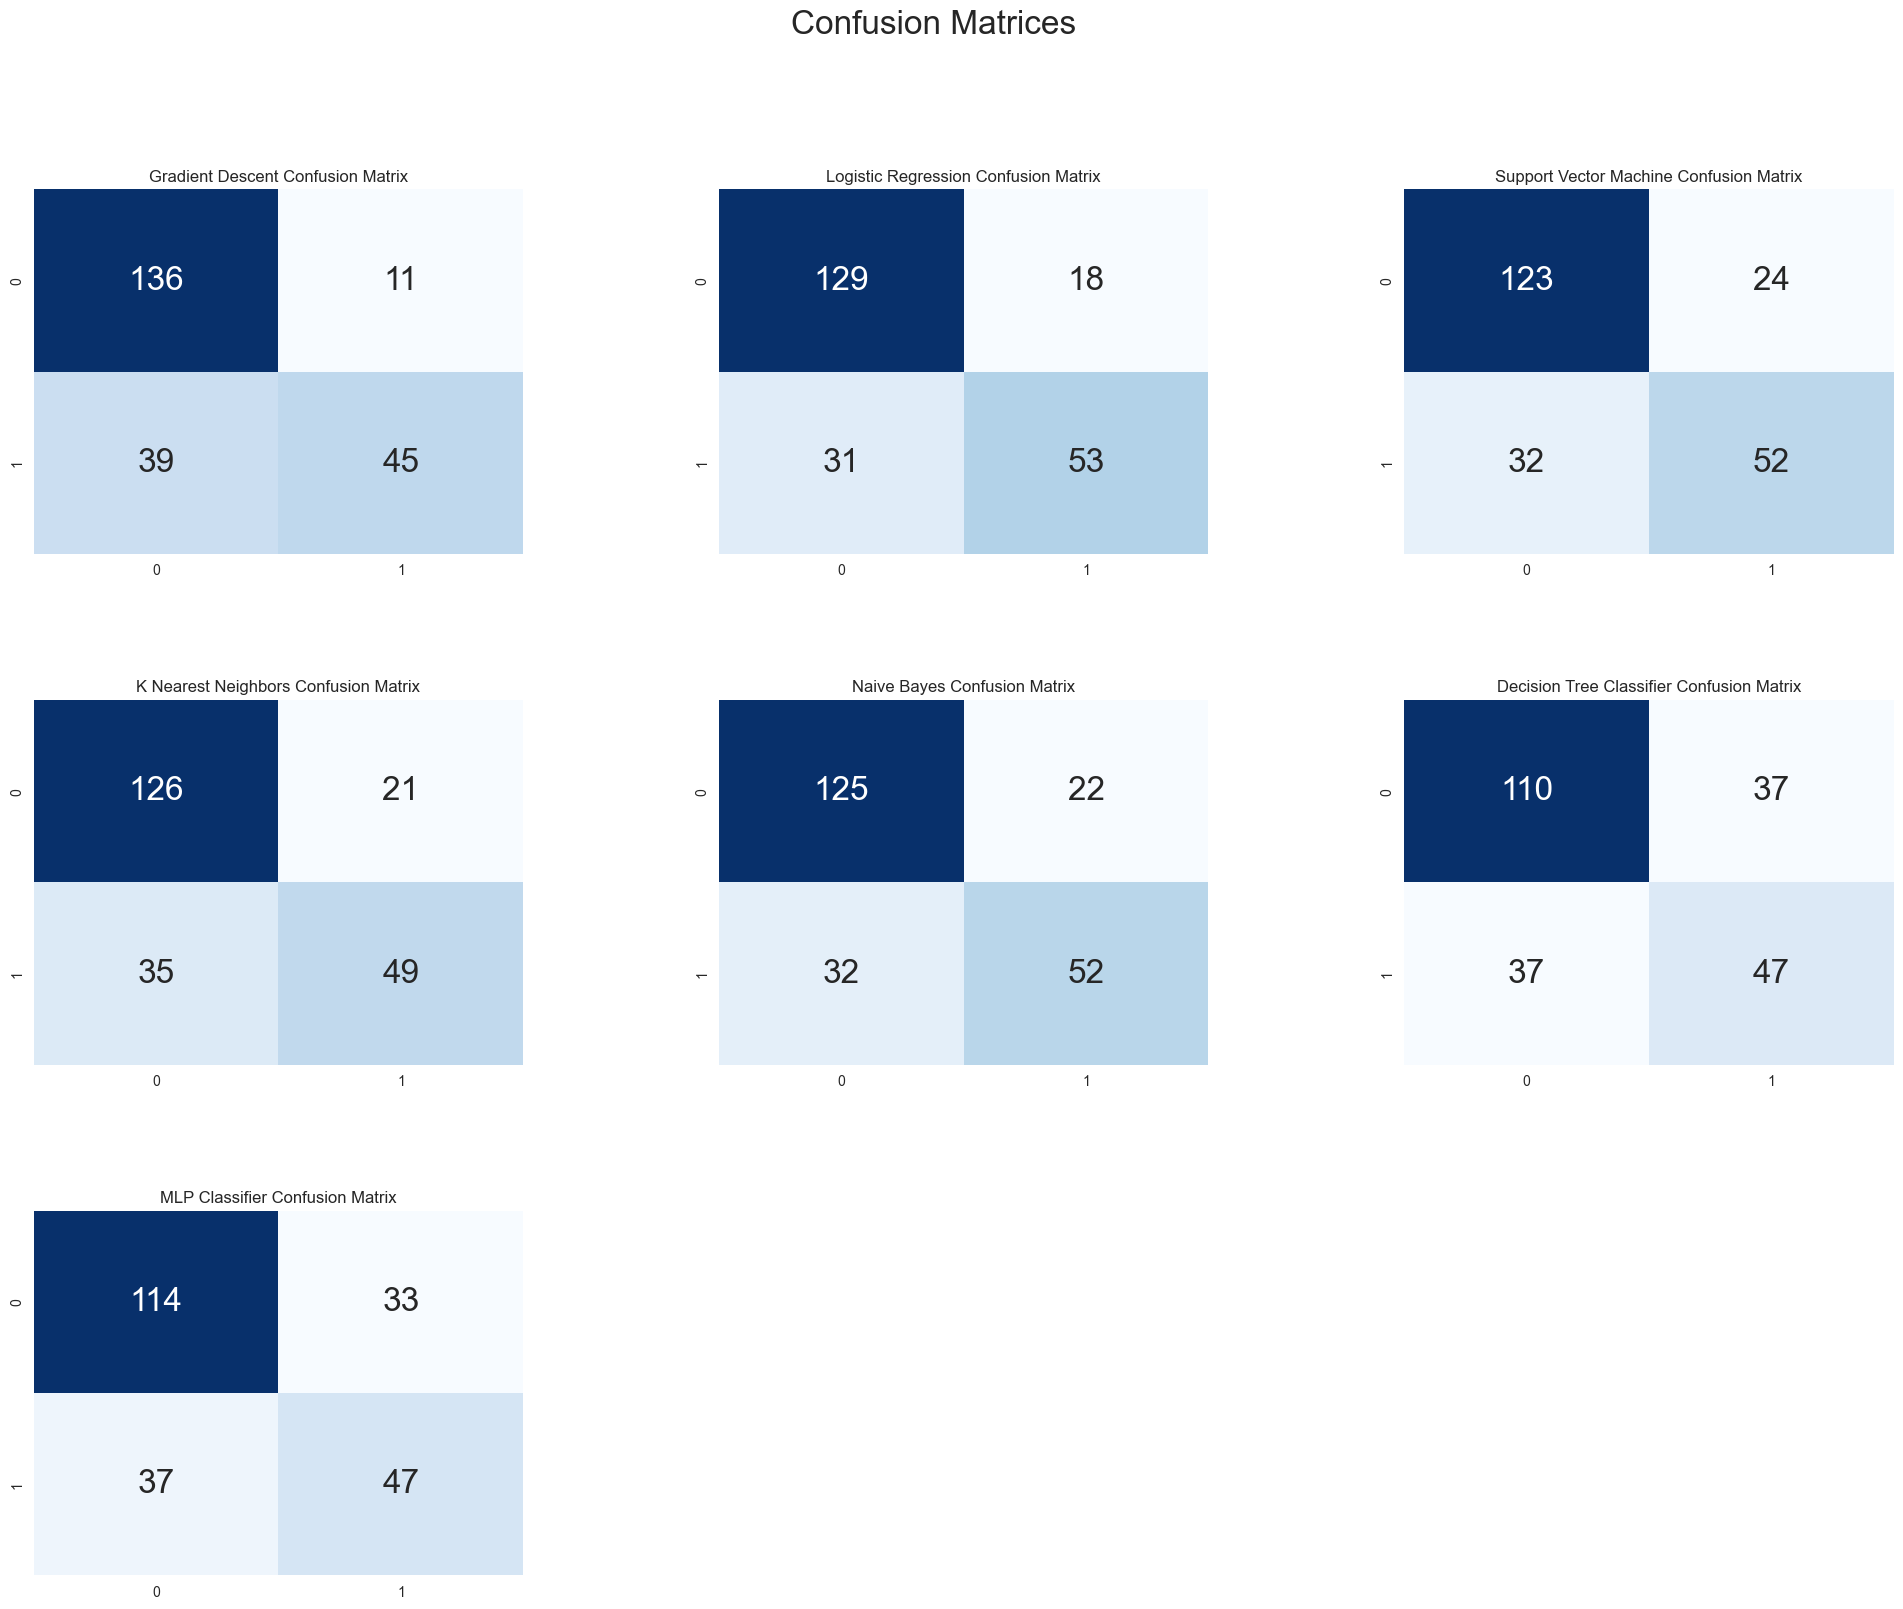

In [607]:
plt.figure(figsize=(24, 18))

plt.suptitle("Confusion Matrices", fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(3,3,1)
plt.title("Gradient Descent Confusion Matrix")
sns.heatmap(cm_gd,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,2)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,4)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,5)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,6)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,7)
plt.title("MLP Classifier Confusion Matrix")
sns.heatmap(cm_nn_clfr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

In [ ]:
# у градиентного спуска 11 ложно-положительных предсказаний и 39 ложно-отрицательных
# у логистической регрессии 18 ложно-положительных предсказаний и 31 ложно-отрицательных

In [609]:
np.unique(y_test, return_counts=True) # в тестовой выборке 84 случая заболеваний

(array([0, 1]), array([147,  84]))

In [ ]:
# Наилучшими моделями по показателю точных предсказаний являются модели градиентного спуска
# и логистической регрессии
# учитывая, что предсказывается болезнь, логично выбрать модель, которая выдает больше предсказаний присутствия
# болезни, то есть, логистическую регрессию